<a href="https://colab.research.google.com/github/jmins33/OTT_project/blob/master/Code/Tving/Tving_Blog_wordcloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !pip install graphviz
# !pip install konlpy

import scipy as sp
import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


# 워닝 없애주는 것
import warnings  
warnings.filterwarnings('ignore')

In [ ]:
from konlpy.tag import Kkma       ; kkma = Kkma()
from konlpy.tag import Hannanum   ; hannanum = Hannanum()
from konlpy.tag import Okt        ; t = Okt()
from konlpy.tag import *
import pickle


In [ ]:
df_r = pd.read_csv("C:/Users/user/Downloads/tiving_all.csv")
df_r

Unnamed: 0  Unnamed: 0.1  \
0              0             0   
1              1             2   
2              2             3   
3              3             4   
4              4             5   
...          ...           ...   
3614         231           292   
3615         232           293   
3616         233           294   
3617         234           297   
3618         235           298   

                                                 title            nickname  \
0     [LG 시네빔 / PF50KA] 미니빔 프로젝터 후기 (+19.3.19 티빙 업데이트)                   쮸   
1                             티빙 vs 푹tv TV다시보기 어플 고르기!                  아랑   
2                             디지털데일리, 채수웅, 2017. 4. 19                 썸데이   
3             깜놀! TV조선 드라마 바벨이 티빙에서 나와요 바벨 1화 바벨 인물관계도   호정마미\n(money0810)   
4                                                  NaN        리리\n(hvelym)   
...                                                ...                 ...   
3614                                   왓챠 무료체험+해지하는 방법                믿을 신   
3615                 잡으면 돈이 된다, tvn 캐시백 정주행하고 작성해보는 리뷰  HRsandyi\n(sandyi)   
3616                                               NaN     제제\n(qhflalsrb)   
3617                       [대만드라마] 상견니 타임리프 로맨스물 (스포X)                 김버찌   
3618                   lg빔프로젝트)가을겨울캠핑필수품  LG시네빔 HF60LA                 쭈찌맘   

                datetime                                            content  
0      2019. 2. 8. 14:37  자취생의 삶의 질을 높여주는 빔프로젝터!!\n이것저것 알아보고 엄청 고민한 끝에 드...  
1      2019. 1. 22. 2:13  티빙 vs 푹tv TV다시보기 어플 고르기!\n+ 결국 둘 다 이용 중ㅋㅋㅋ 드라마...  
2      2019. 1. 1. 21:19   현재의 시점에서 티빙과 푹을 비교해보았다.  기사가 작성되었을 시점 이후로, Po...  
3      2019. 1. 29. 1:01  공짜 재방 사이트에서 힘들게 힘들게 보고 있었는데요 허걱 티빙에서 나오는 줄 알았음...  
4      2019. 2. 8. 23:59   안녕하세요 리리입니다\n저는 평소에  Mnet에서 방송하는 "썸바디"라는 \n예능...  
...                  ...                                                ...  
3614  2020. 9. 22. 10:52  이미 티빙이랑 웨이브로 \n미드랑 방송이랑 다 보고 있는데\n오늘 산드라 오 기사를...  
3615   2020. 9. 23. 4:17  최근 재밌게 보는 예능 하나가 생겼다.\n1화까지만 해도 별로 볼 생각이 없어 하고...  
3616  2020. 9. 21. 17:08  저희 집이 평수를 넓혀서 이사를 가게 되면서 가전들도 새롭게 바꾸게 되었는데요 거의...  
3617  2020. 9. 23. 12:10  ㅠㅠㅠ 이름만 들어도 아련해지네 \n오랜만에 친구 추천으로 대만드라마 봤는데 여운이...  
3618  2020. 9. 23. 22:47  개인적으로알아본정보입니다 혹시 수정할부분이 있는경우댓글부탁드립니다 :)\n안녕하세요...  

[3619 rows x 6 columns]

In [ ]:
df_r['title']

0       [LG 시네빔 / PF50KA] 미니빔 프로젝터 후기 (+19.3.19 티빙 업데이트)
1                               티빙 vs 푹tv TV다시보기 어플 고르기!
2                               디지털데일리, 채수웅, 2017. 4. 19
3               깜놀! TV조선 드라마 바벨이 티빙에서 나와요 바벨 1화 바벨 인물관계도
4                                                    NaN
                              ...                       
3614                                     왓챠 무료체험+해지하는 방법
3615                   잡으면 돈이 된다, tvn 캐시백 정주행하고 작성해보는 리뷰
3616                                                 NaN
3617                         [대만드라마] 상견니 타임리프 로맨스물 (스포X)
3618                     lg빔프로젝트)가을겨울캠핑필수품  LG시네빔 HF60LA
Name: title, Length: 3619, dtype: object

In [ ]:
content_list = df_r.content.values.tolist()

print(len(content_list))
content_list

3619


['자취생의 삶의 질을 높여주는 빔프로젝터!!\n이것저것 알아보고 엄청 고민한 끝에 드디어 구매했당 ㅎㅎ\n인터넷 최저가는 75만원정도 인데 중고나라에서 미개봉제품 65만원에 get! (개이득) 박스가 좀 커보이지만 미니빔 맞다. 구성품은 이렇다.\n빔. 리모컨. 충전기. 설명서 연결하는 부분\n랜선도 있고 usb, hdmi, 오디오잭 등등이 있는듯.. 전원 연결하고 빔을 켜면 언어설정, 와이파이설정 등등 여러가지 설정을 하면 된다.\nlg TV가 있으면 연결이 된다던데 집에 티비가 있긴한데.. lg꺼인지는 모르겠고.. 어쨌든 설정을 끝내고 나면 이런 지지직 화면이 나온다.. 두둥..\n티비를 연결 안해서 안나오는거다. ㅋㅋㅋㅋㅋ 리모컨의 홈버튼을 누르면 티빙, 푹, 넷플릭스, 유튜브 등등 빔에 깔려있는 어플을 실행할 수 있다.\n나는 티빙, 푹, 넷플릭스를 이용하고 있어서 로그인해서 잘 되는지 확인해보았다. 모두 다 잘 나온다. 다만.. 푹은 모바일+PC만 보는 이용권이었어서.. \nTV까지 포함된 이용권으로 업그레이드를 해야하고.. ㅠㅠ 티빙은 원래 CJ One 아이디를 썼었는데 여기서는 LG로 로그인을 해야한다..\n이용권도 새로 구매해야 하구..\n일단 티빙쪽에 이용권 문의를 해두긴 했는데 아마 이거도 이용권을 바꿔야 할 거 같다 ㅠㅠ\n+++\n19.3.19 추가\n드디어 cj one 아이디랑 통합해서 쓸 수 있는 이용권이 나왔다!\n대신 무제한 플러스 이용권을 사용해야 한다.\nlg 시네빔에서 티빙 어플을 업데이트 하면 통합아이디로 사용할 수 있다.\n그런데 업데이트 하니 UI가 좀 불편하다 ㅠㅠ..\n그리고 아직 내 이용권 기간 남았는데 괜히 업데이트 했다.. 아까워..\n다운그레이드 할 수 있는지는 모르겠지만 귀찮으니 걍 요금 업데이트 해버렸다 ㅎ 유튜브는 신기하게 모바일이랑 로그인이 연동된다..!\n같은 와이파이에 연결되어 있으면 모바일에서 클릭한번만 하면 빔이랑 연동된다 그럼 이렇게 모바일에서 보던 영상들이 연동되어서 맞춤영상에 뜬다 (짱신기

In [ ]:
import nltk
from konlpy.tag import Kkma; Kkma = Kkma()

In [ ]:
# 리스트 중 str 타입이 아닌 요소들이 존재함을 확인
for i in content_list:
    if type(i) == float:
        i = str(i)
        print(i)

In [ ]:
# str 타입이 아닌 요소들이 있으면 전부 str 타입으로 바꿔라!
for i in range(len(content_list)):
    if type(content_list[i]) != str:
        content_list[i] = str(content_list[i])

In [ ]:
content_text = ''

for each_line in content_list[:2000]:
    content_text = content_text + each_line + '\n'

In [ ]:
tokens_ko = t.morphs(content_text)
tokens_ko

['자취',
 '생',
 '의',
 '삶',
 '의',
 '질',
 '을',
 '높여주는',
 '빔',
 '프로젝터',
 '!!',
 '\n',
 '이',
 '것',
 '저',
 '것',
 '알아보고',
 '엄청',
 '고민',
 '한',
 '끝',
 '에',
 '드디어',
 '구매',
 '했당',
 'ㅎㅎ',
 '\n',
 '인터넷',
 '최저',
 '가는',
 '75만원',
 '정도',
 '인데',
 '중고나라',
 '에서',
 '미개',
 '봉',
 '제품',
 '65만원',
 '에',
 'get',
 '!',
 '(',
 '개이득',
 ')',
 '박스',
 '가',
 '좀',
 '커',
 '보이',
 '지만',
 '미니',
 '빔',
 '맞다',
 '.',
 '구',
 '성품',
 '은',
 '이렇다',
 '.',
 '\n',
 '빔',
 '.',
 '리모컨',
 '.',
 '충전기',
 '.',
 '설명',
 '서',
 '연결하는',
 '부분',
 '\n',
 '랜선',
 '도',
 '있고',
 'usb',
 ',',
 'hdmi',
 ',',
 '오디오',
 '잭',
 '등등',
 '이',
 '있는듯',
 '..',
 '전원',
 '연결하고',
 '빔',
 '을',
 '켜면',
 '언어',
 '설정',
 ',',
 '와이파이',
 '설정',
 '등등',
 '여러가지',
 '설정',
 '을',
 '하면',
 '된다',
 '.',
 '\n',
 'lg',
 'TV',
 '가',
 '있으면',
 '연결',
 '이',
 '된다던데',
 '집',
 '에',
 '티비',
 '가',
 '있긴한데',
 '..',
 'lg',
 '꺼인지는',
 '모르겠고',
 '..',
 '어쨌든',
 '설정',
 '을',
 '끝내고',
 '나면',
 '이런',
 '지지',
 '직',
 '화면',
 '이',
 '나온다',
 '..',
 '두둥',
 '..',
 '\n',
 '티비',
 '를',
 '연결',
 '안해',
 '서',
 '안',
 '나오는거다',
 '.',
 'ㅋㅋㅋㅋ

In [ ]:
ko = nltk.Text(tokens_ko)   
print(len(ko.tokens))          # 토큰 전체 갯수
print(len(set(ko.tokens)))     # 토큰 unique 갯수

1322915
78585


In [ ]:

ko = nltk.Text(tokens_ko)
ko.vocab().most_common(100)    # 가장 많이 나온 단어 100개


[('\n', 63562),
 ('.', 33215),
 ('이', 26681),
 ('을', 21021),
 (',', 19044),
 ('에', 18926),
 ('가', 15120),
 ('를', 14182),
 ('의', 13225),
 ('은', 11136),
 ('는', 11094),
 ('도', 9981),
 ('들', 8306),
 ('으로', 7863),
 ('로', 7546),
 ('에서', 7220),
 ('!', 6772),
 ('한', 6463),
 ('(', 6190),
 ('것', 6187),
 ('수', 6050),
 (')', 5902),
 ('티빙', 4681),
 ('하고', 4470),
 ('하는', 4249),
 ('..', 4147),
 ('다', 3980),
 ('...', 3856),
 ('드라마', 3810),
 ('할', 3803),
 ('나', 3728),
 ('과', 3573),
 ('와', 3380),
 ('만', 3130),
 ('너무', 3124),
 ('있는', 3089),
 ('인', 3025),
 ('적', 2991),
 ("'", 2976),
 ('때', 2855),
 ('?', 2853),
 ('영화', 2795),
 ('안', 2789),
 ('내', 2769),
 ('고', 2672),
 ('그', 2597),
 ('저', 2540),
 ('-', 2534),
 ('더', 2510),
 ('~', 2461),
 ('까지', 2442),
 ('잘', 2398),
 ('요', 2379),
 ('1', 2277),
 ('입니다', 2269),
 ('생각', 2237),
 ('TV', 2224),
 ('넷플릭스', 2165),
 ('사용', 2147),
 (':', 2128),
 ('2', 2086),
 ('볼', 2080),
 ('이용', 2050),
 ('그리고', 2011),
 ('방송', 1982),
 ('해서', 1950),
 ('해', 1929),
 ('거', 1872),
 ('중', 18

In [ ]:
# 불용어 : 인터넷 검색 시 검색 용어로 사용하지 않는 단어. 관사, 전치사, 조사, 접속사 등 검색 색인 단어로 의미가 없는 단어
stop_words = [')','?','1','"(', '_', ')/','\n','.',',', '<','!','(','(', '??','..', '4', '|', '>', '?(', '"…', '#', '&', '・', "']",'.',' ','/',"'",'’','”','“','·', '[','!','\n','·','‘','"','\n ',']',':','…',')','(','-', 'nan','가','요','답변','...','을','수','에','질문','제','를','이','도',
                      '좋','1','는','로','으로','2','것','은','다',',','니다','대','들',
                      '2017','들','데','..','의','때','겠','고','게','네요','한','일','할',
                      '10','?','하는','06','주','려고','인데','거','좀','는데','~','ㅎㅎ',
                      '하나','이상','20','뭐','까','있는','잘','습니다','다면','했','주려',
                      '지','있','못','후','중','줄','6','과','어떤','기본','!!',
                      '단어','라고','중요한','합','가요','....','보이','네','무지','에서','하고']

tokens_ko = [each_word for each_word in tokens_ko
             if each_word not in stop_words]

ko = nltk.Text(tokens_ko)
ko.vocab().most_common(50)

[('티빙', 4681),
 ('드라마', 3810),
 ('나', 3728),
 ('와', 3380),
 ('만', 3130),
 ('너무', 3124),
 ('인', 3025),
 ('적', 2991),
 ('영화', 2795),
 ('안', 2789),
 ('내', 2769),
 ('그', 2597),
 ('저', 2540),
 ('더', 2510),
 ('까지', 2442),
 ('입니다', 2269),
 ('생각', 2237),
 ('TV', 2224),
 ('넷플릭스', 2165),
 ('사용', 2147),
 ('볼', 2080),
 ('이용', 2050),
 ('그리고', 2011),
 ('방송', 1982),
 ('해서', 1950),
 ('해', 1929),
 ('등', 1837),
 ('사람', 1819),
 ('진짜', 1782),
 ('보고', 1757),
 ('서비스', 1745),
 ('서', 1643),
 ('3', 1635),
 ('집', 1611),
 ('이다', 1594),
 ('다시', 1588),
 ('정말', 1583),
 ('때문', 1557),
 ('말', 1518),
 ('많이', 1508),
 ('전', 1492),
 ('에는', 1470),
 ('있습니다', 1451),
 ('시간', 1439),
 ('번', 1425),
 ('부터', 1420),
 ('콘텐츠', 1417),
 ('보기', 1398),
 ('또', 1394),
 ('합니다', 1383)]

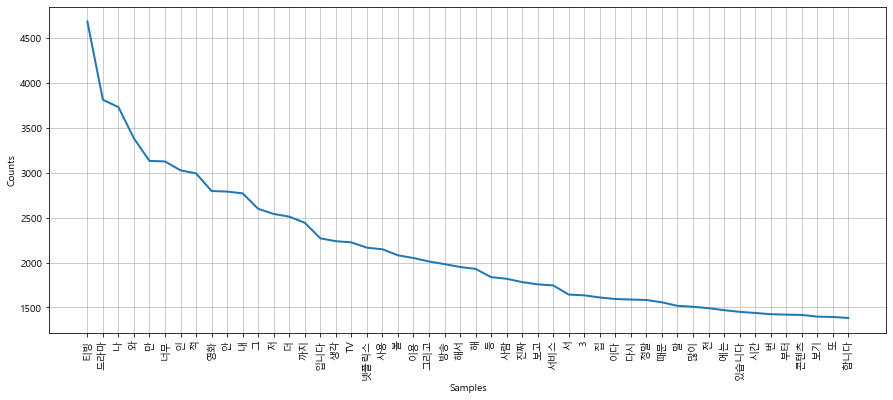

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz             
from sklearn.tree import export_graphviz
plt.figure(figsize=(15,6))
ko.plot(50) 
plt.show()

# 그래프에서 한글 폰트 깨지는 문제에 대한 대처(전역 글꼴 설정)
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family=font_name)

In [ ]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image


In [ ]:
data = ko.vocab().most_common(300)

print(len(data))
data

300


[('티빙', 4681),
 ('드라마', 3810),
 ('나', 3728),
 ('와', 3380),
 ('만', 3130),
 ('너무', 3124),
 ('인', 3025),
 ('적', 2991),
 ('영화', 2795),
 ('안', 2789),
 ('내', 2769),
 ('그', 2597),
 ('저', 2540),
 ('더', 2510),
 ('까지', 2442),
 ('입니다', 2269),
 ('생각', 2237),
 ('TV', 2224),
 ('넷플릭스', 2165),
 ('사용', 2147),
 ('볼', 2080),
 ('이용', 2050),
 ('그리고', 2011),
 ('방송', 1982),
 ('해서', 1950),
 ('해', 1929),
 ('등', 1837),
 ('사람', 1819),
 ('진짜', 1782),
 ('보고', 1757),
 ('서비스', 1745),
 ('서', 1643),
 ('3', 1635),
 ('집', 1611),
 ('이다', 1594),
 ('다시', 1588),
 ('정말', 1583),
 ('때문', 1557),
 ('말', 1518),
 ('많이', 1508),
 ('전', 1492),
 ('에는', 1470),
 ('있습니다', 1451),
 ('시간', 1439),
 ('번', 1425),
 ('부터', 1420),
 ('콘텐츠', 1417),
 ('보기', 1398),
 ('또', 1394),
 ('합니다', 1383),
 ('이렇게', 1374),
 ('있다', 1369),
 ('보다', 1309),
 ('분', 1304),
 ('랑', 1292),
 ('된', 1282),
 ('했다', 1271),
 ('무료', 1263),
 ('하면', 1253),
 ('시청', 1245),
 ('바로', 1231),
 ('아', 1228),
 ('같은', 1223),
 ('오늘', 1200),
 (',,', 1164),
 ('에게', 1145),
 ('화', 1141),
 ('채널', 1

In [ ]:
# list tuple을 딕셔너리로 만들어주는 함수
def todict(list_tuple):    
    todict = {}
    for i in range(0,len(list_tuple)):
        todict[data[i][0]] = data[i][1]
    return todict

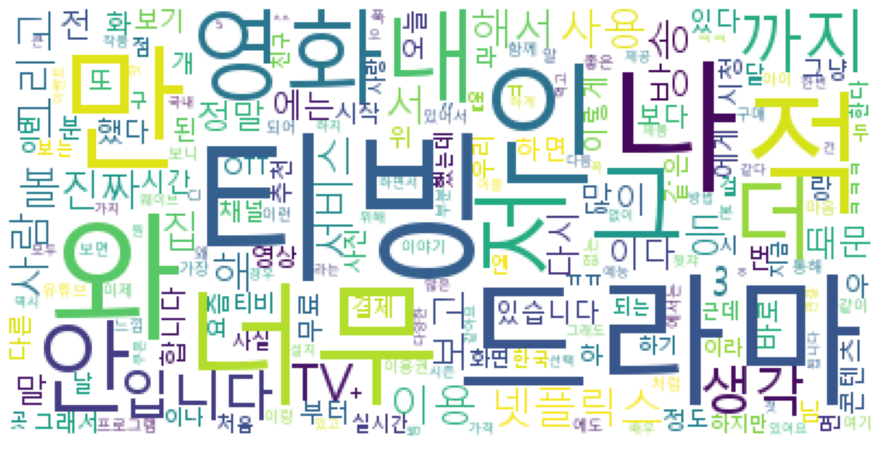

In [ ]:
# 워드클라우드를 그려보자
wordcloud = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',
                      relative_scaling = 0.2,
                      #stopwords=STOPWORDS,
                      background_color='white',
                      ).generate_from_frequencies(todict(data))

plt.figure(figsize=(16,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()